In [2]:
#P4 module 1 - FINANCIAL DATA PIPELINE
# DAY 1 : PULL BOND DATA FROM YFINANCE

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("LIBRARIES IMPORTED SUCCESSFULLY!")
print(f"Today's date : {datetime.now().strftime('%Y-%m-%d')}")

LIBRARIES IMPORTED SUCCESSFULLY!
Today's date : 2026-02-19


In [3]:
# Pull US Treasury Bond ETF data (TLT - 20+ Year Treasury)
# This represents bond market data

print("Fetching bond data...")

bond_ticker = yf.Ticker("TLT")
bond_data = bond_ticker.history(period="1y")  # Last 1 year of data

print(f"\nData pulled successfully!")
print(f"Total rows: {len(bond_data)}")
print(f"\nFirst 5 rows:")
print(bond_data.head())

Fetching bond data...

Data pulled successfully!
Total rows: 251

First 5 rows:
                                Open       High        Low      Close  \
Date                                                                    
2025-02-19 00:00:00-05:00  84.180950  84.659522  84.123523  84.429810   
2025-02-20 00:00:00-05:00  84.659527  84.956247  84.659527  84.745674   
2025-02-21 00:00:00-05:00  85.061535  86.076107  85.013675  85.769821   
2025-02-24 00:00:00-05:00  85.501825  86.200537  85.434825  86.018684   
2025-02-25 00:00:00-05:00  87.071553  87.578839  86.908840  87.502266   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2025-02-19 00:00:00-05:00  20584300        0.0           0.0            0.0  
2025-02-20 00:00:00-05:00  27913400        0.0           0.0            0.0  
2025-02-21 00:00:00-05:00  46912300        0.0           0.0            0.0  
2025-02-24 00:00:0

DATASET INFO:
DATERANGE:2025-02-19 00:00:00-05:00) to 2026-02-18 00:00:00-05:00

columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Capital Gains']

basic statistics:
count    251.000000
mean      86.390946
std        2.095032
min       81.211983
25%       84.703056
50%       86.827888
75%       87.947895
max       90.700951
Name: Close, dtype: float64


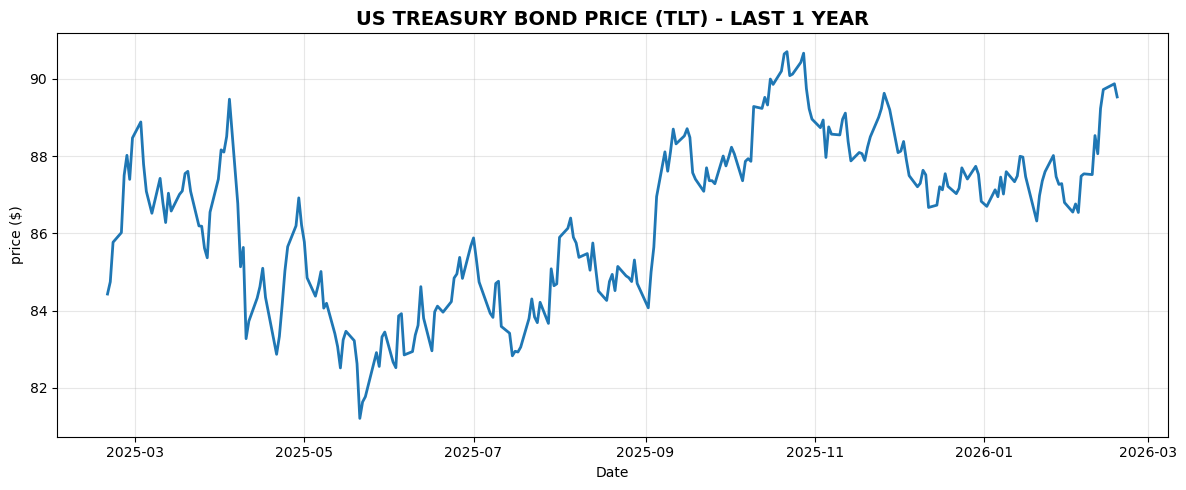


 bond data visualized successfully!


In [4]:
# explore the bond data

print("DATASET INFO:")
print(f"DATERANGE:{bond_data.index[0]}) to {bond_data.index[-1]}")
print(f"\ncolumns: {list(bond_data.columns)}")
print(f"\nbasic statistics:")
print(bond_data['Close'].describe())

#plot the bond price trend 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(bond_data.index, bond_data['Close'],linewidth=2)
plt.title('US TREASURY BOND PRICE (TLT) - LAST 1 YEAR', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n bond data visualized successfully!")

In [5]:
#pull multiple bond tickers for comparison 
#TLT = LONG-TERM TREASURY , IEF = MID-TERM, SHY=SHORT-TERM

print("Fetching multiple bond datasets ...")

tickers=['TLT','IEF','SHY']
bond_prices = {}

for ticker in tickers:
    data= yf.Ticker(ticker).history(period='1y')
    bond_prices[ticker]=data['Close']
    print(f"{ticker} data pulled - {len(data)} rows")

#combine into one dataframe
all_bonds=pd.DataFrame(bond_prices)
print(f"\ncombined dataset shape: {all_bonds.shape}")
print(all_bonds.head())

Fetching multiple bond datasets ...
TLT data pulled - 251 rows
IEF data pulled - 251 rows
SHY data pulled - 251 rows

combined dataset shape: (251, 3)
                                 TLT        IEF        SHY
Date                                                      
2025-02-19 00:00:00-05:00  84.429810  89.505081  79.043617
2025-02-20 00:00:00-05:00  84.745674  89.687996  79.053238
2025-02-21 00:00:00-05:00  85.769821  90.217506  79.188042
2025-02-24 00:00:00-05:00  86.018684  90.410034  79.245827
2025-02-25 00:00:00-05:00  87.502266  91.122467  79.351746


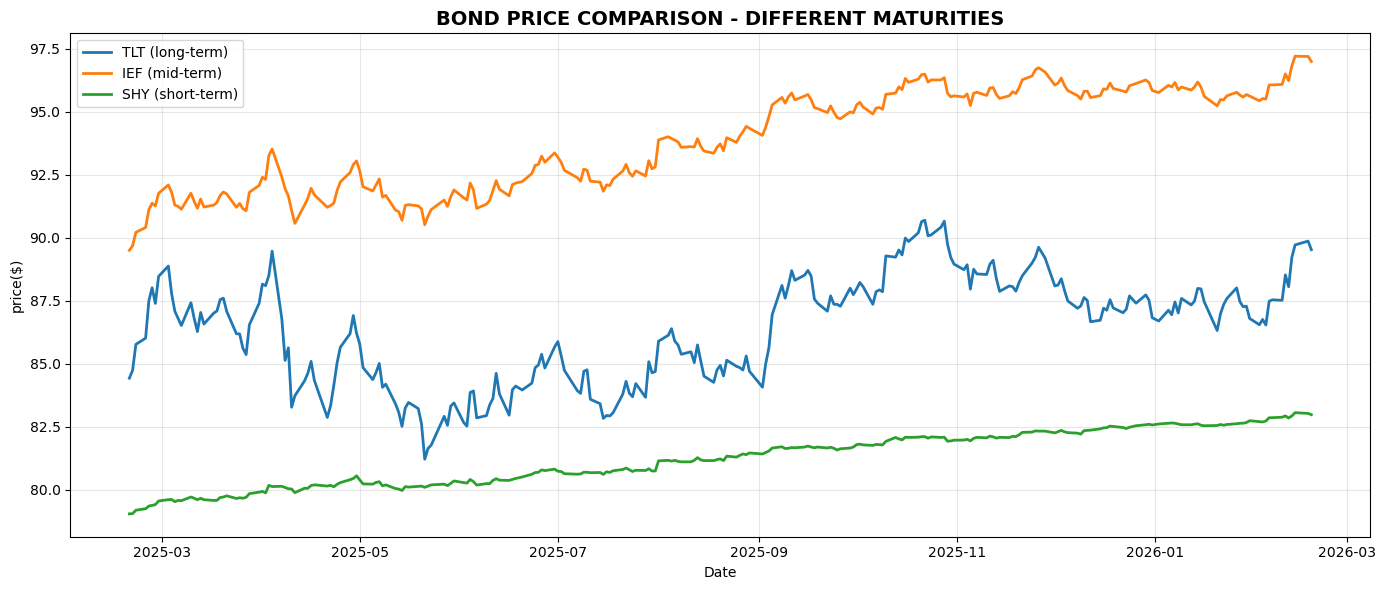

multi-bond visualisation complete!


In [6]:
# plot all three bonds on one chart 

plt.figure(figsize=(14,6))

plt.plot(all_bonds.index,all_bonds['TLT'],label='TLT (long-term)' , linewidth=2)
plt.plot(all_bonds.index,all_bonds['IEF'],label='IEF (mid-term)' , linewidth=2)
plt.plot(all_bonds.index,all_bonds['SHY'],label='SHY (short-term)' , linewidth=2)

plt.title('BOND PRICE COMPARISON - DIFFERENT MATURITIES',fontsize=14,fontweight='bold')
plt.xlabel('Date')
plt.ylabel('price($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("multi-bond visualisation complete!")

In [7]:
# save the bond data to csv for later use 

all_bonds.to_csv('bond_prices_raw.csv')
print(f"data saved! file: bond_prices_raw.csv")
print(f"total data points saved: {all_bonds.shape[0]*all_bonds.shape[1]}")

data saved! file: bond_prices_raw.csv
total data points saved: 753


In [8]:
# module 1 part 2 -data cleaning

print("checking for missing values ...")
print(all_bonds.isnull().sum())

#fill any missing values with forward fill method
all_bonds_clean=all_bonds.fillna(method='ffill')

#calculate daily returns (perentage change)
returns = all_bonds_clean.pct_change()
returns = returns.dropna() # remove first row (nan)

print(f"\nReturns dataset shape: {returns.shape}")
print(returns.head())

checking for missing values ...
TLT    0
IEF    0
SHY    0
dtype: int64

Returns dataset shape: (250, 3)
                                TLT       IEF       SHY
Date                                                   
2025-02-20 00:00:00-05:00  0.003741  0.002044  0.000122
2025-02-21 00:00:00-05:00  0.012085  0.005904  0.001705
2025-02-24 00:00:00-05:00  0.002902  0.002134  0.000730
2025-02-25 00:00:00-05:00  0.017247  0.007880  0.001337
2025-02-26 00:00:00-05:00  0.005907  0.002747  0.000364


C:\Users\LEKSHMIKANTH\AppData\Local\Temp\ipykernel_13576\3303472695.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  all_bonds_clean=all_bonds.fillna(method='ffill')


In [9]:
# save cleaned data and returns 
all_bonds_clean.to_csv('bond_prices_clean.csv')
returns.to_csv('bond_returns.csv')

print("module 1 completed!")
print(f"files saved:")
print(" - bond_prices_clean.csv ({} rows)".format(len(all_bonds_clean)))
print(" - bond_returns.csv ({} rows)".format(len(returns)))
print("\nReady for module 2 - model building !")


module 1 completed!
files saved:
 - bond_prices_clean.csv (251 rows)
 - bond_returns.csv (250 rows)

Ready for module 2 - model building !
